In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
df_train.shape

(1235, 29)

In [5]:
df_test.shape

(824, 28)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     824 non-null    int64  
 1   surgery                824 non-null    object 
 2   age                    824 non-null    object 
 3   hospital_number        824 non-null    int64  
 4   rectal_temp            824 non-null    float64
 5   pulse                  824 non-null    float64
 6   respiratory_rate       824 non-null    float64
 7   temp_of_extremities    789 non-null    object 
 8   peripheral_pulse       777 non-null    object 
 9   mucous_membrane        811 non-null    object 
 10  capillary_refill_time  818 non-null    object 
 11  pain                   795 non-null    object 
 12  peristalsis            805 non-null    object 
 13  abdominal_distention   802 non-null    object 
 14  nasogastric_tube       760 non-null    object 
 15  nasoga

In [8]:
df_train['outcome'].value_counts()

outcome
lived         574
died          410
euthanized    251
Name: count, dtype: int64

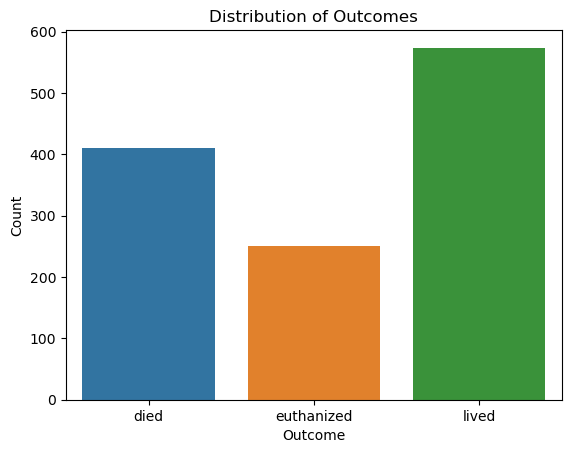

In [9]:
sns.countplot(x = df_train['outcome'])
plt.title('Distribution of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [10]:
df_train.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [11]:
df_test.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       35
peripheral_pulse          47
mucous_membrane           13
capillary_refill_time      6
pain                      29
peristalsis               19
abdominal_distention      22
nasogastric_tube          64
nasogastric_reflux        14
nasogastric_reflux_ph      0
rectal_exam_feces        125
abdomen                  154
packed_cell_volume         0
total_protein              0
abdomo_appearance         31
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [12]:
df_train.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [13]:
df_test.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [14]:
df_train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [15]:
df_test.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,824.000000,8.240000e+02,824.000000,824.000000,824.00000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.0
mean,1646.500000,1.108357e+06,38.244539,80.229369,30.71966,4.508495,49.063350,20.796238,3.336420,3709.803398,12.391990,0.0
std,238.012605,1.555627e+06,0.785234,29.164711,17.43191,1.883464,10.450138,26.413588,1.539235,5112.931057,197.067771,0.0
min,1235.000000,5.213990e+05,36.000000,36.000000,9.00000,1.000000,23.000000,3.900000,0.100000,0.000000,0.000000,0.0
25%,1440.750000,5.287430e+05,37.800000,54.000000,18.00000,3.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.0
50%,1646.500000,5.298085e+05,38.200000,76.000000,28.00000,4.500000,48.000000,7.500000,3.300000,2209.000000,0.000000,0.0
75%,1852.250000,5.346440e+05,38.600000,100.000000,36.00000,6.500000,55.000000,8.900000,4.300000,3205.000000,0.000000,0.0
max,2058.000000,5.305129e+06,40.800000,184.000000,96.00000,7.500000,75.000000,89.000000,10.100000,31110.000000,4300.000000,0.0


In [16]:
# Drop 'id' column
df_train = df_train.drop('id', axis=1)
df_test_ids = df_test['id']
df_test = df_test.drop('id', axis=1)

In [17]:
# Handle missing values denoted by '?'
for col in df_train.columns[df_train.isnull().any()].tolist():
    df_train = df_train[df_train[col] != '?']

for col in df_test.columns[df_test.isnull().any()].tolist():
    df_test = df_test[df_test[col] != '?']

In [18]:
# Encode categorical features
le = LabelEncoder()
for col in df_train.select_dtypes(include='object').columns:
    df_train[col] = le.fit_transform(df_train[col])

for col in df_test.select_dtypes(include='object').columns:
    df_test[col] = le.fit_transform(df_test[col])

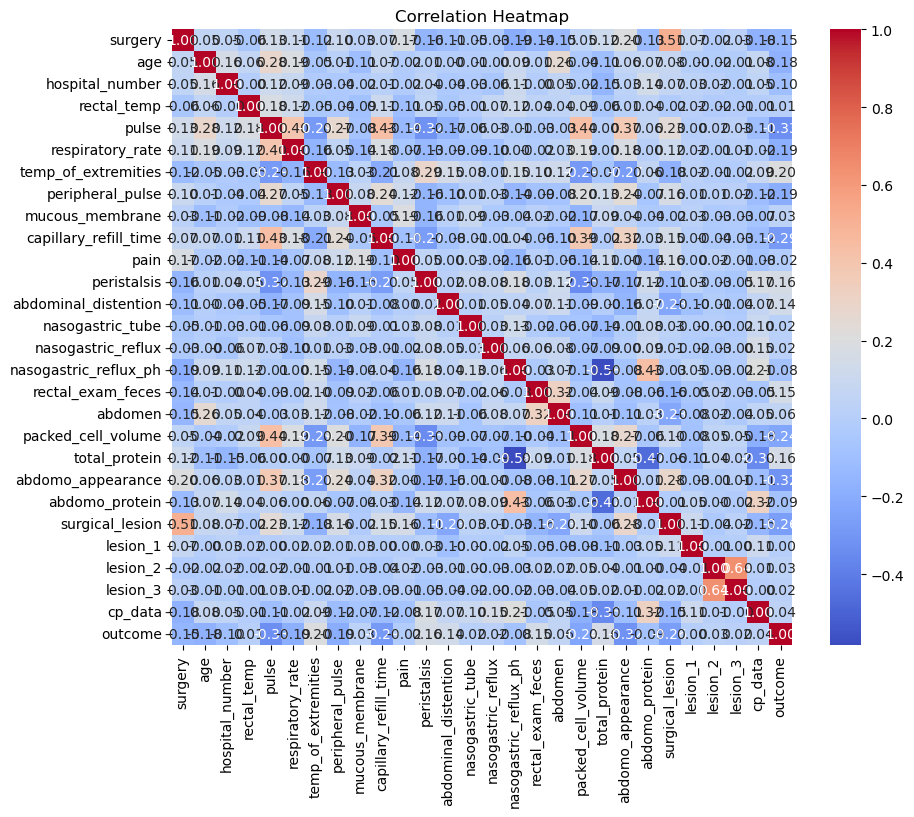

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Drop columns in Train
df_train.drop(['age', 'hospital_number', 'rectal_temp', 'temp_of_extremities', 'peripheral_pulse',
         'mucous_membrane', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube',
         'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'lesion_1', 'cp_data'], 
        axis=1, inplace=True)

In [21]:
# Drop columns in Test
df_test.drop(['age', 'hospital_number', 'rectal_temp', 'temp_of_extremities', 'peripheral_pulse',
         'mucous_membrane', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube',
         'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'lesion_1', 'cp_data'], 
        axis=1, inplace=True)

In [22]:
df_test.dtypes

surgery                    int32
pulse                    float64
respiratory_rate         float64
capillary_refill_time      int32
nasogastric_reflux_ph    float64
packed_cell_volume       float64
total_protein            float64
abdomo_appearance          int32
abdomo_protein           float64
surgical_lesion            int32
lesion_2                   int64
lesion_3                   int64
dtype: object

In [23]:
# Split data into features and target variable
X_train = df_train.drop('outcome', axis=1)
y_train = df_train['outcome']

In [24]:
# Split data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
# Initialize and train Random Forest Classifier
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train_split, y_train_split)

RandomForestClassifier()

In [26]:
# Initialize and train XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_split, y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
# Initialize and train KNN Classifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_split, y_train_split)

KNeighborsClassifier(n_neighbors=3)

In [28]:
# Calculate accuracy on training and testing sets
rdf_train_accuracy = rdf_model.score(X_train_split, y_train_split)

xgb_train_accuracy = xgb_model.score(X_train_split, y_train_split)

KNN_train_accuracy = KNN_model.score(X_train_split, y_train_split)

print('Random Forest Classifier Training Accuracy:', rdf_train_accuracy)

print('XGBoost Classifier Training Accuracy:', xgb_train_accuracy)

print('KNN Classifier Training Accuracy:', KNN_train_accuracy)

Random Forest Classifier Training Accuracy: 0.992914979757085
XGBoost Classifier Training Accuracy: 0.9919028340080972
KNN Classifier Training Accuracy: 0.7631578947368421


In [29]:
# Save trained models as pickle files
with open('rdf_model.pkl', 'wb') as f:
    pickle.dump(rdf_model, f)

In [30]:
# Predict outcomes for test data using Random Forest
result_rdf = rdf_model.predict(df_test)

In [31]:
# Map predicted labels to original labels
label_mapping = {0: 'died', 1: 'euthanized', 2: 'lived'}
original_labels_rdf = [label_mapping[label] for label in result_rdf]

In [32]:
# Create DataFrame for submission (include only 'lived' outcomes)
result_df = pd.DataFrame({'id': df_test_ids, 'outcome': original_labels_rdf})

In [33]:
# Save results to CSV
result_df.to_csv('submission.csv', index=False)